# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [123]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
combined_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [124]:
# Checking the number of mice.
mice_number = combined_data['Mouse ID'].nunique()
mice_number

249

In [125]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

duplicate_mice

array(['g989'], dtype=object)

In [126]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_data = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
dup_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [127]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_data[combined_data['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [128]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = clean_df['Mouse ID'].nunique()
new_mice_count

248

## Summary Statistics

In [129]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

clean_df.describe()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_mean = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
drug_mean

drug_median = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
drug_median

drug_var = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
drug_var

drug_std = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
drug_std

drug_sem = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
drug_sem

# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.DataFrame({'Mean Tumor Volume':drug_mean,
                          'Median Tumor Volume': drug_median,
                          'Tumor Volume Variance': drug_var,
                          'Tumor Volume Std. Dev.': drug_std,
                          'Tumor Volume Std. Err.': drug_sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [130]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

#tumor_vol_mean = summary_df.groupby('Drug Regimen').mean()['Mean Tumor Volume']
#tumor_vol_mean

#tumor_vol_median = summary_df.groupby('Drug Regimen').median()['Median Tumor Volume']
#tumor_vol_median

#tumor_vol_var = summary_df.groupby('Drug Regimen').var()['Tumor Volume Variance']
#tumor_vol_var

#tumor_vol_std = summary_df.groupby('Drug Regimen').std()['Tumor Volume Std. Dev.']
#tumor_vol_std

#tumor_vol_sem = summary_df.groupby('Drug Regimen').sem()['Tumor Volume Std. Err.']
#tumor_vol_sem
# Using the aggregation method, produce the same summary statistics in a single line.
tumor_summary = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
tumor_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


Text(0, 0.5, 'Number of Mice Tested')

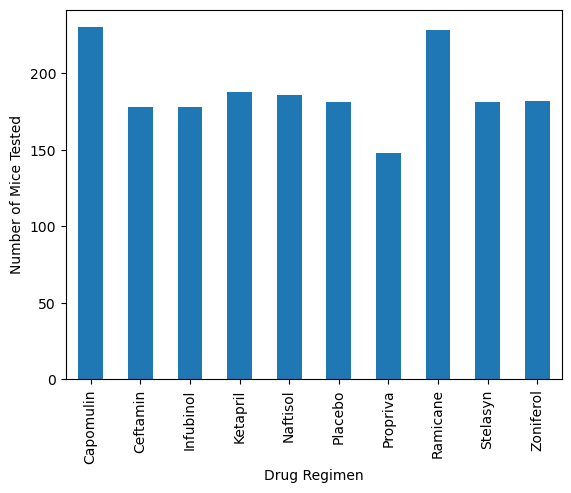

In [175]:
# Generate a bar plot showing the total number mice tested for each drug regimen using Pandas.
regimen_mice_count = clean_df.groupby(['Drug Regimen']).count()['Mouse ID']

print(regimen_mice_count)

regimen_mice_count.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")


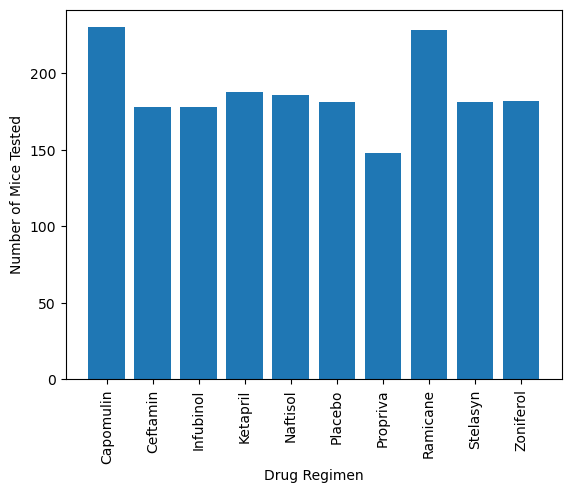

In [179]:
# Generate a bar plot showing the total number of all mice tested for each drug regimen using pyplot.
x_axis = regimen_mice_count.index.values
y_axis = regimen_mice_count.values

plt.bar(x_axis, y_axis)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")

plt.show()

In [210]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# see how many mice there are per gender
mice_gender_counts = clean_df.groupby(['Sex']).nunique()

mice_gender_counts

# create a new df based on the gender counts
gender_df = pd.DataFrame(mice_gender_counts)
gender_df

gender_df.groupby(['Sex']).plot(kind='pie', y='Sex', autopct='%1.0f%%')

plt.show()

KeyError: 'Sex'

In [198]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

